In [18]:
import matplotlib.pyplot as plt
import cv2 
import pytesseract
from PIL import Image
from reportlab.lib.pagesizes import A4, letter
# Adding custom options

custom_config = r'--oem 2 --psm 12 -l fra+eng'



In [19]:
A4_int = (int(round(A4[0])), int(round(A4[1])))

In [20]:
img_path = './carte-grise-specimen.jpg'

In [21]:
fx=1
fy=1

In [22]:
# img = cv2.imread('img/test1.jpg',cv2.IMREAD_UNCHANGED)
img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (A4_int[0],A4_int[1]) ,interpolation=cv2.INTER_CUBIC)
img = cv2.resize(img, None,fx=fx,fy=fy ,interpolation=cv2.INTER_CUBIC)

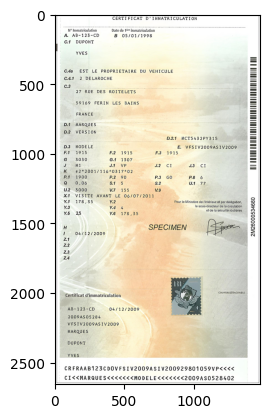

In [23]:
plt.imshow(img)

In [24]:
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [25]:
# test = pytesseract.image_to_string(Image.fromarray(img), config=custom_config)
# test

In [26]:
# Perform OCR on the RGB image using pytesseract
text = pytesseract.image_to_data(Image.fromarray(img),output_type='dict',config=custom_config)

In [27]:
boxes = len(text['level'])
for i in range(boxes ):
    (x, y, w, h) = (text['left'][i], text['top'][i], text['width'][i], text['height'][i])
    #Draw box        
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

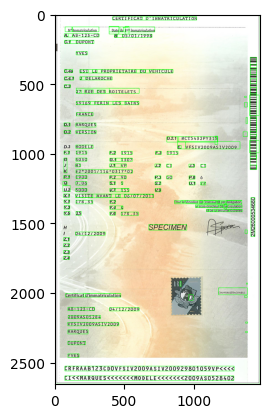

In [28]:
plt.imshow(img)

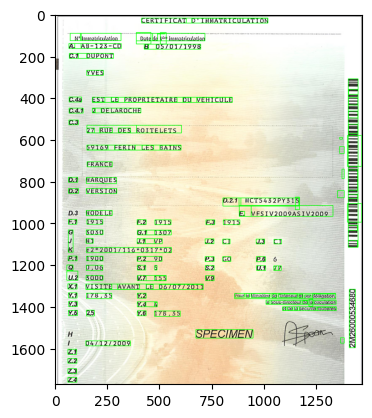

In [29]:
plt.imshow(img[0:round((2/3)*img.shape[0]),:])

In [30]:
for i in range(boxes ):
    (x, y, w, h,chara) = (text['left'][i] , text['top'][i], text['width'][i], text['height'][i],text["text"][i])
    print(x, y, w, h,chara)

0 0 1472 2656 
413 19 604 24 
413 19 604 24 
413 19 604 24 
413 19 214 24 CERTIFICAT
653 20 364 23 D'IbMNATRICULATION
488 92 36 3 
488 92 36 3 
488 92 36 3 
488 92 36 3 es
72 92 243 35 
72 92 243 35 
72 92 243 35 
72 92 49 35 N
125 92 190 35 Irmroadrhulotlon
388 92 328 36 
388 92 328 36 
388 92 328 36 
388 88 70 55 “Dane
466 92 24 35 do
503 88 28 55 1&%
531 92 185 36 [ramatileulstion
66 141 250 24 
66 141 250 24 
66 141 250 24 
66 141 28 24 A
124 141 192 24 AB-123-CD
426 144 270 24 
426 144 270 24 
426 144 270 24 
426 144 21 23 B
483 144 213 24 05/01/1998
68 188 211 24 
68 188 211 24 
68 188 211 24 
68 188 43 24 C.1
151 188 128 24 DUPONT
151 269 80 24 
151 269 80 24 
151 269 80 24 
151 269 80 24 YVES
67 397 60 24 
67 397 60 24 
67 397 60 24 
67 397 60 24 C.da
178 398 669 25 
178 398 669 25 
178 398 669 25 
178 398 60 23 EST
268 399 34 22 LE
332 398 251 24 PROPRIETAIRE
611 399 39 23 DU
677 399 170 24 VEHICULE
67 450 67 24 
67 450 67 24 
67 450 67 24 
67 450 67 24 C.4.1
178 450 232 23 
1

In [31]:
def adjust_text_boxes(text_data):
    # Zip the text data into tuples for easier manipulation
    boxes = list(zip([pos * A4[0] / img.shape[1] for pos in text_data['left']], 
                     [A4[1] - pos * A4[1]/img.shape[0] for pos in text_data['top']], 
                     [pos * A4[0] / img.shape[1] for pos in text_data['width']],
                       [pos * A4[1]/img.shape[0]  for pos in text_data['height']],
                         text_data['text']))

    # Sort the text boxes based on their vertical positions (top to bottom)
    sorted_boxes = sorted(boxes, key=lambda box: box[1])

    # Set a threshold for height difference to identify text on the same line
    threshold_height = 16 * A4[1]/img.shape[0]  # Adjust this value as needed
    threshold_font_size = 4
    # Correct text boxes that are too close in height
    for i in range(len(sorted_boxes) - 1):
        current_box = sorted_boxes[i]
        next_box = sorted_boxes[i + 1]

        # If the vertical distance between the current and next box is within the threshold
        if abs(current_box[1] - next_box[1]) < threshold_height:
            # Adjust the next box's top position to align it with the current box
            new_top = current_box[1]
            sorted_boxes[i + 1] = (next_box[0], new_top, next_box[2], next_box[3], next_box[4])
        if abs(current_box[3] - next_box[3]) < threshold_font_size:
                
                sorted_boxes[i + 1] = (sorted_boxes[i + 1][0], sorted_boxes[i + 1][1], sorted_boxes[i + 1][2], current_box[3], sorted_boxes[i + 1][4]) 
 

    # Unzip the corrected data
    corrected_data = {
        'left': [box[0] for box in sorted_boxes],
        'top': [box[1] for box in sorted_boxes],
        'width': [box[2] for box in sorted_boxes],
        'height': [box[3] for box in sorted_boxes],
        'text': [box[4] for box in sorted_boxes]
    }

    return corrected_data

# Example usage:
# Assuming 'text' contains the extracted text data similar to what you previously retrieved from Tesseract
corrected_text_data = adjust_text_boxes(text)

In [32]:
set(corrected_text_data["height"])

{0.9509297030642256,
 2.8527891091926767,
 6.339531353761504,
 6.973484489137654,
 7.2904610568257295,
 7.607437624513805,
 8.241390759889955,
 9.509297030642257,
 10.460226733706481,
 10.777203301394556,
 11.09417986908263,
 11.728133004458781,
 12.045109572146858,
 12.362086139834934,
 12.996039275211084,
 13.946968978275308,
 14.263945545963383,
 15.84882838440376,
 16.48278151977991,
 17.433711222844135,
 19.018594061284514,
 28.21091452423869,
 30.746727065743297,
 33.916492742624044,
 46.912532017835126,
 88.75343895266104,
 255.48311355658862,
 841.8897637795276}

In [33]:
from reportlab.pdfgen import canvas

def hello(c,left,top,text,pixel):
    c.setFont("Helvetica", pixel)
    c.drawString(left,top,text,charSpace=0.25)
c = canvas.Canvas("hello.pdf")
boxes_correct = len(corrected_text_data["left"])
for i in range(boxes ):
    if corrected_text_data["text"][i] !="": 
        (x, y, w, h,chara) = (corrected_text_data['left'][i]  ,corrected_text_data['top'][i], corrected_text_data['width'][i], corrected_text_data['height'][i],corrected_text_data["text"][i])
        hello(c,x,y,chara,h)
        # c.rect(x, y, w, h-1)
c.showPage()
c.save()

In [58]:
import sys
import cv2
import numpy as np
import pytesseract
from datetime import datetime

startTime = datetime.now()

input_image_path = sys.argv[1]

img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None,fx=fx,fy=fy ,interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype(
    "uint8"
)

# apply gamma correction using the lookup table
gray = cv2.LUT(gray, table)

ret, thresh1 = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[
    -2:
]


def biggestRectangle(contours):
    biggest = True
    max_area = 0
    indexReturn = -1
    for index in range(len(contours)):
        i = contours[index]
        area = cv2.contourArea(i)
        if area > 100:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.1 * peri, True)
            if area > max_area:  # and len(approx)==4:
                biggest = approx
                max_area = area
                indexReturn = index
    return indexReturn


indexReturn = biggestRectangle(contours)
hull = cv2.convexHull(contours[indexReturn])

# create a crop mask
mask = np.zeros_like(img)  # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, contours, indexReturn, 255, -1)  # Draw filled contour in mask
out = np.zeros_like(img)  # Extract out the object and place into output image
out[mask == 255] = img[mask == 255]

# crop the image
(y, x, _) = np.where(mask == 255)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = img[topy : bottomy + 1, topx : bottomx + 1, :]

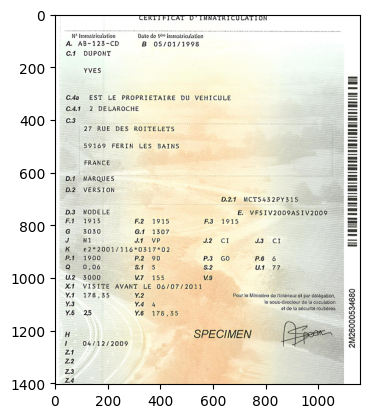

In [59]:
out = out[0:round((2/3)*out.shape[0]),:]
out = cv2.resize(out, None,fx=0.8,fy=0.8 ,interpolation=cv2.INTER_CUBIC)
plt.imshow(out)

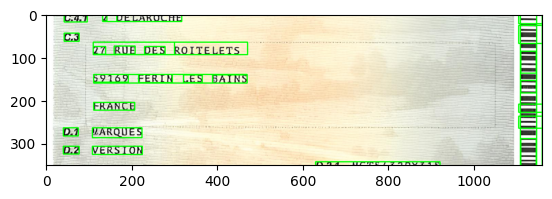

In [69]:
plt.imshow(out[0:round((1/4)*out.shape[0]),:])
plt.imshow(out[round((1/4)*out.shape[0]):round((2/4)*out.shape[0]),:])

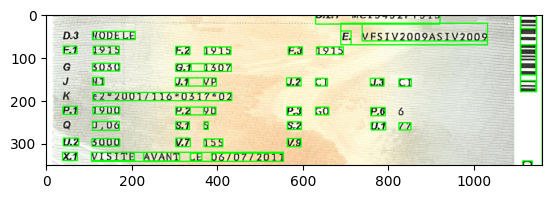

In [70]:
plt.imshow(out[round((2/4)*out.shape[0]):round((3/4)*out.shape[0]),:])

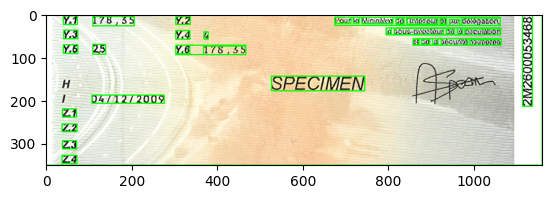

In [72]:
plt.imshow(out[round((3/4)*out.shape[0]):round((4/4)*out.shape[0]),:])

In [60]:
text = pytesseract.image_to_data(Image.fromarray(out),output_type='dict',config=custom_config)
boxes = len(text['level'])
for i in range(boxes ):
    (x, y, w, h,chara) = (text['left'][i] , text['top'][i], text['width'][i], text['height'][i],text["text"][i])
    print(x, y, w, h,chara)

0 0 1160 1404 
319 5 484 19 
319 5 484 19 
319 5 484 19 
319 5 171 19 CERTIFICAT
511 6 292 18 D'IMNATRICULATION
379 63 64 2 
379 63 64 2 
379 63 64 2 
379 63 64 2 éc
561 65 8 1 
561 65 8 1 
561 65 8 1 
561 65 8 1 =
47 63 194 28 
47 63 194 28 
47 63 194 28 
47 63 39 28 W
89 63 143 28 Irmmoatilaulotion
299 63 262 29 
299 63 262 29 
299 63 262 29 
299 63 83 28 “Dene
364 59 16 46 de
391 74 27 17 1
425 64 136 28 fraraulculoion
41 102 201 20 
41 102 201 20 
41 102 201 20 
41 103 23 19 A
88 102 154 19 AB-123-CD
330 105 216 19 
330 105 216 19 
330 105 216 19 
330 105 16 18 B
375 105 171 19 05/01/1998
43 140 169 19 
43 140 169 19 
43 140 169 19 
43 140 34 19 C.1
109 140 103 19 DUPONT
109 205 65 19 
109 205 65 19 
109 205 65 19 
109 205 65 19 YVEs
42 307 48 19 
42 307 48 19 
42 307 48 19 
42 307 48 19 C.da
131 308 535 20 
131 308 535 20 
131 308 535 20 
131 308 48 18 EST
203 309 27 17 LE
254 308 202 19 PROPRIETAIRE
477 309 32 18 DU
530 308 136 20 VEHICULE
42 350 54 19 
42 350 54 19 
42 350 54 19

In [61]:
boxes = len(text['level'])
for i in range(boxes ):
    (x, y, w, h) = (text['left'][i], text['top'][i], text['width'][i], text['height'][i])
    #Draw box        
    cv2.rectangle(out, (x, y), (x + w, y + h), (0, 255, 0), 2)

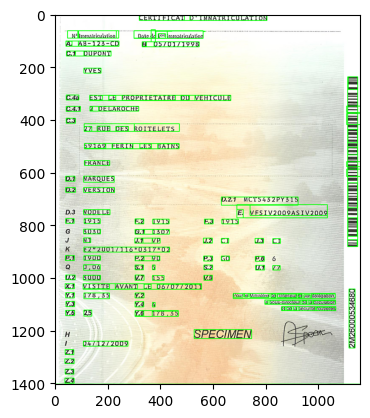

In [62]:
plt.imshow(out)

In [63]:
import re
merge_x = 20
merge_y = 10
liste_d2 = []
for i in range(boxes):
    (x, y, w, h, chara) = (text['left'][i], text['top'][i], text['width'][i], text['height'][i], text["text"][i])

    # Check if the coordinates match the region of interest
    if re.search(r'^[dD0]\.2', chara) or re.search(r'^[dD0]2', chara) :
        liste_d2.append((x,y,w,h,chara))

In [64]:
liste_d2

[(40, 658, 37, 18, 'D.2')]

In [65]:

text_concat = " ".join(text["text"])
# Define the regex pattern
pattern = r'[A-Z]{2}-\d{3}-[A-Z]{2}'

# Search for the pattern in the text
match = re.search(pattern, text_concat)

# If a match is found, print the result
if match:
    print(f"N. d'immatriculation  : {match.group()}")


# Define the regex pattern for the date
date_pattern = r'\b\d{2}/\d{2}/\d{4}\b'

# Find all occurrences of the date pattern in the text
date_matches = re.findall(date_pattern, text_concat)

# Print the list of matches
print(f"Date de 1er immarticulation : {date_matches[0]}")
print(f"Visite avant le  : {date_matches[1]}")
print(f"Date d'immarticulation actuelle  : {date_matches[2]}")

N. d'immatriculation  : AB-123-CD
Date de 1er immarticulation : 05/01/1998
Visite avant le  : 06/07/2011
Date d'immarticulation actuelle  : 04/12/2009
